In [1]:
import sys
sys.path.append('/home/alok/study/imi/masterarbeit/histo_ssd/src')
from datasets.lizard_detection import LizardDetectionDataset
from pathlib import Path
import numpy as np
from tqdm import trange
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
ds = LizardDetectionDataset.from_datadir(
    data_dir=Path('/home/alok/cbmi/data/LizardDataset'),
    image_size=np.array([300, 300]),
    image_stride=np.array([300, 300]),
    use_cache=False,
    show_progress=True,
    ignore_image=True,
)


Loading Dataset: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 238/238 [00:12<00:00, 19.31it/s]


In [3]:
def box_area(boxes: np.ndarray) -> np.ndarray:
    """
    Calculates the area of all given boxes.
    :param boxes: An array with shape (NUM_BOXES, 4), each sample containing (l, t, r, b).
    :return: The area of each box with shape (NUM_BOXES,)
    """
    return (boxes[:, 2] - boxes[:, 0]) * (boxes[:, 3] - boxes[:, 1])

def box_mean_size(boxes: np.ndarray) -> np.ndarray:
    return ((boxes[:, 2] - boxes[:, 0]) + (boxes[:, 3] - boxes[:, 1])) * 0.5

def filter_boxes(boxes):
    valid_box_indices = boxes[:, 0] != -1.0  # filter out invalid boxes
    return boxes[valid_box_indices]

In [4]:
all_boxes = []
for i in trange(len(ds)):
    sample = ds[i]
    boxes = filter_boxes(sample['boxes'])
    all_boxes.append(boxes)
all_boxes = np.concatenate(all_boxes)
print(all_boxes.shape)


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2455/2455 [00:00<00:00, 51198.37it/s]

(321584, 5)


In [5]:
boxes = all_boxes[:, 1:]
box_areas = box_area(boxes)
box_mean_sizes = box_mean_size(boxes)
box_areas = box_areas[box_mean_sizes < 0.3]
box_mean_sizes = box_mean_sizes[box_mean_sizes < 0.3]

print(np.min(box_mean_sizes), np.max(box_mean_sizes))
print(np.min(box_areas), np.max(box_areas))

0.0066666603 0.21000001
3.333327e-05 0.04019999


In [6]:
# bins = np.linspace(0, 0.2, 11)
bins = np.linspace(0, 0.044, 11+1)

print(bins)

[0.    0.004 0.008 0.012 0.016 0.02  0.024 0.028 0.032 0.036 0.04  0.044]


In [7]:
# bin_result = np.digitize(box_mean_sizes, bins)
bin_result = np.digitize(box_areas, bins)
values, counts = np.unique(bin_result, return_counts=True)
value_to_count = {}
for value, count in zip(values, counts):
    # print(value, ': ', count, sep='')
    value_to_count[value] = count

x_ticks = []
x = []
y = []
labels = []
label_counter = 0
for i in range(len(bins)-1):
    x_ticks.append(i)
    x.append(i+1)
    y.append(value_to_count.get(i+1, 0))
    if label_counter == 0:
        labels.append('<{:.3f}'.format(bins[i+1]))
    else:
        labels.append('')
    label_counter = (label_counter + 1) % 16

#for xs, ys, l in zip(x, y, labels):
#    print(xs, ys, l)
# print(labels)

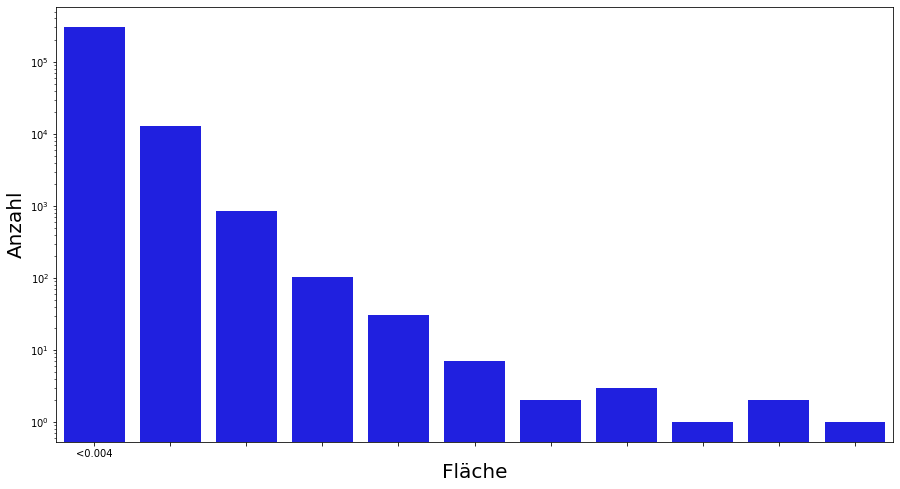

In [8]:
fig, ax = plt.subplots(figsize=(15,8))


plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=18)
sns.barplot(x=x, y=y, ax=ax, palette=['blue'])
ax.set_yscale('log')
ax.set_ylabel('Anzahl', fontsize=20)
ax.set_xlabel('Fläche', fontsize=20)
ax.set_xticks(ticks=x_ticks, labels=labels)

None

In [9]:
np.mean(box_areas)

0.0015970023

In [11]:
box_length = []
for i in trange(len(ds)):
    boxes = filter_boxes(ds[i]['boxes'])
    box_length.append(len(boxes))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2455/2455 [00:00<00:00, 50823.11it/s]

321584
2455


In [14]:
print(sum(box_length))
print(len(ds))
print('boxes per image:', sum(box_length) / len(ds))

321584
2455
boxes per image: 130.99144602851325
